In [1]:
#Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Load Iris dataset

iris_df = pd.read_csv("IRIS.csv")

In [3]:
# Explore the Dataset

# Check the shape of the dataset
print("Shape of the dataset:", iris_df.shape)

# Check for missing values
print("Missing values:", iris_df.isnull().sum())

# Check data types
print("Data types:", iris_df.dtypes)

# Summarize statistics
print("Summary statistics:", iris_df.describe())

Shape of the dataset: (150, 5)
Missing values: sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Data types: sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object
Summary statistics:        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


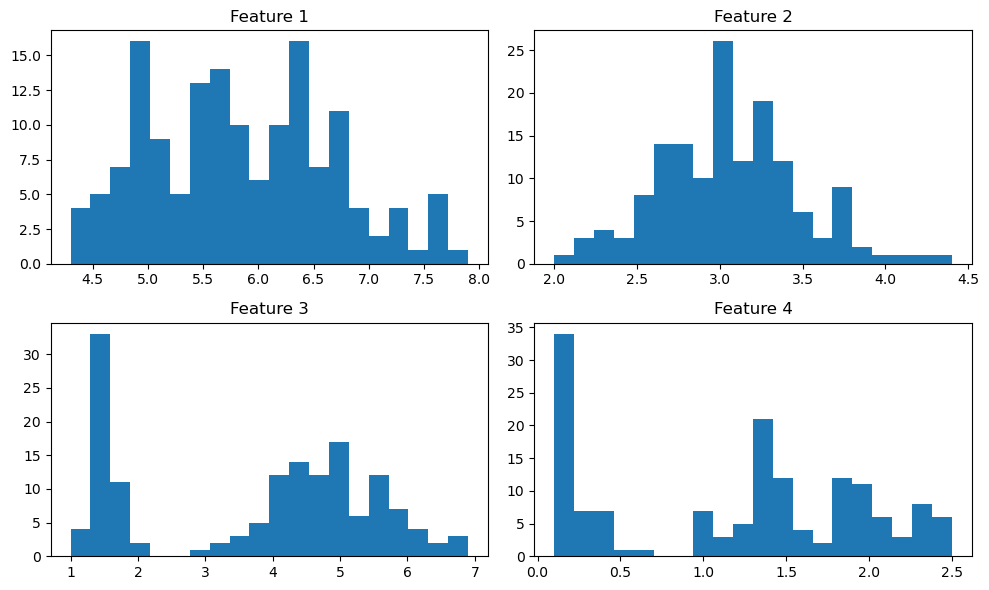

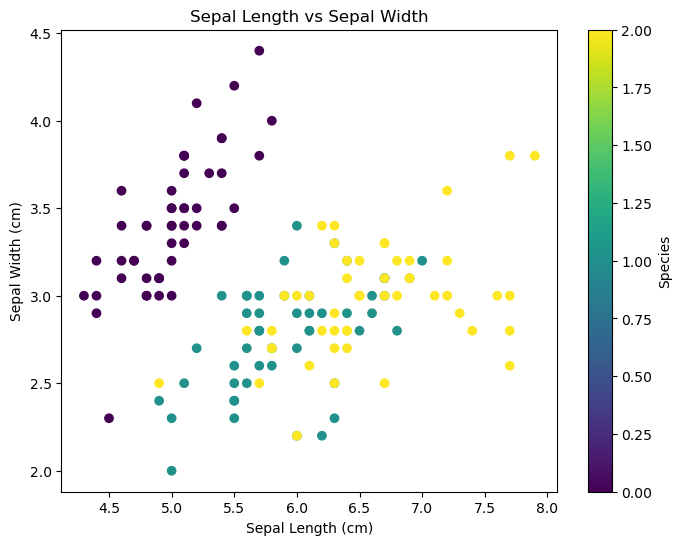

In [4]:
# Visualize the Data

# Visualize feature distributions
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.hist(iris_df.iloc[:, i], bins=20)
    plt.title(f'Feature {i+1}')
plt.tight_layout()
plt.show()

# Visualize relationships between features
plt.figure(figsize=(8, 6))
plt.scatter(iris_df['sepal_length'], iris_df['sepal_width'], c=iris_df['species'].astype('category').cat.codes, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.colorbar(label='Species')
plt.show()

In [5]:
# Preprocess the Data

X = iris_df.drop('species', axis=1)
y = iris_df['species']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
# Select a model 

model = SVC(kernel='rbf', random_state=42)  # Using Radial Basis Function (RBF) kernel for SVM

In [8]:
# Train the model

model.fit(X_train, y_train)

SVC(random_state=42)

In [9]:
# Evaluate the model

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



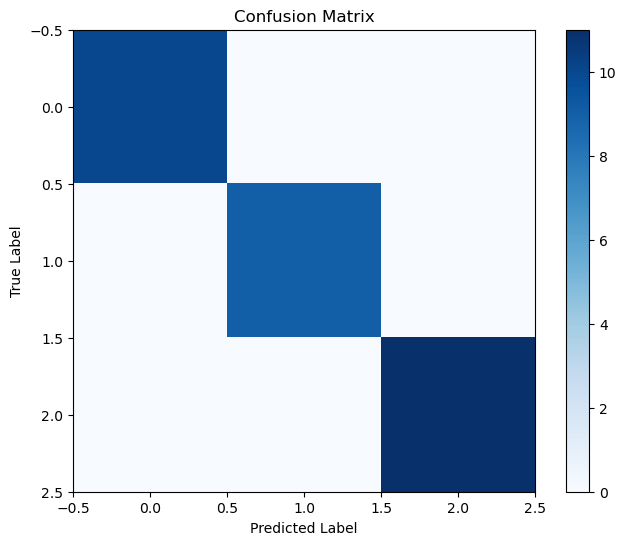

In [10]:
# Visualize the confusion matrix

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()